In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import zipfile

In [3]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: socofing/SOCOFing/Real/191__F_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Left_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_ring_finger.BMP  
  inflating: socofing/SOCOFing/Real/191__F_Right_thumb_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_index_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_little_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_middle_finger.BMP  
  inflating: socofing/SOCOFing/Real/192__M_Left_ring_finger.BMP  
  i

In [2]:
import numpy as np
import cv2
import os
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense,Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def extract_label(img_path, train=True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')

    if train:
        gender, lr, finger, _, _ = etc.split('_')
    else:
        gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr =0 if lr == 'Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([finger], dtype=np.uint16)


In [4]:
def load_data(path, train):
    print("loading data from: ", path)
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (96, 96))
            label = extract_label(os.path.join(path, img),train)
            data.append([label[0], img_resize ])

    return data

In [5]:
Hard_path='/content/SOCOFing/Altered/Altered-Hard'
Easy_path='/content/SOCOFing/Altered/Altered-Easy'
Medium_path='/content/SOCOFing/Altered/Altered-Medium'
Real_path='/content/SOCOFing/Real'

In [6]:
Easy_data = load_data(Easy_path, train = True)
Medium_data = load_data(Medium_path, train = True)
Hard_data = load_data(Hard_path, train = True)
test = load_data(Real_path, train = False)



loading data from:  /content/SOCOFing/Altered/Altered-Easy
loading data from:  /content/SOCOFing/Altered/Altered-Medium
loading data from:  /content/SOCOFing/Altered/Altered-Hard
loading data from:  /content/SOCOFing/Real


In [7]:
img, labels = [], []
for label, feature in Easy_data:
    labels.append(label)
    img.append(feature)

In [8]:
for label, feature in Medium_data:
    labels.append(label)
    img.append(feature)

In [9]:
for label, feature in Hard_data:
    labels.append(label)
    img.append(feature)

In [10]:
X_train  = np.array(img).reshape(-1, 96, 96, 1)
X_train  = X_train  / 255.0

In [11]:
print(X_train .ndim)
print(X_train .shape)

4
(49270, 96, 96, 1)


In [12]:
y_train = np.array(labels)

In [13]:
X_train.shape, y_train.shape

((49270, 96, 96, 1), (49270,))

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=uint16)

In [15]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 256)               7

In [16]:
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
308/308 [==============================] - 26s 61ms/step - loss: 1.1687 - accuracy: 0.5096 - val_loss: 1.0225 - val_accuracy: 0.5860
Epoch 2/30
308/308 [==============================] - 15s 50ms/step - loss: 0.9832 - accuracy: 0.6012 - val_loss: 0.9423 - val_accuracy: 0.6183
Epoch 3/30
308/308 [==============================] - 15s 49ms/step - loss: 0.8775 - accuracy: 0.6494 - val_loss: 0.8514 - val_accuracy: 0.6542
Epoch 4/30
308/308 [==============================] - 15s 49ms/step - loss: 0.7983 - accuracy: 0.6880 - val_loss: 0.7710 - val_accuracy: 0.7037
Epoch 5/30
308/308 [==============================] - 15s 48ms/step - loss: 0.7115 - accuracy: 0.7273 - val_loss: 0.7356 - val_accuracy: 0.7065
Epoch 6/30
308/308 [==============================] - 15s 49ms/step - loss: 0.6210 - accuracy: 0.7723 - val_loss: 0.6189 - val_accuracy: 0.7712
Epoch 7/30
308/308 [==============================] - 15s 49ms/step - loss: 0.5269 - accuracy: 0.8155 - val_loss: 0.5435 - val_accuracy:

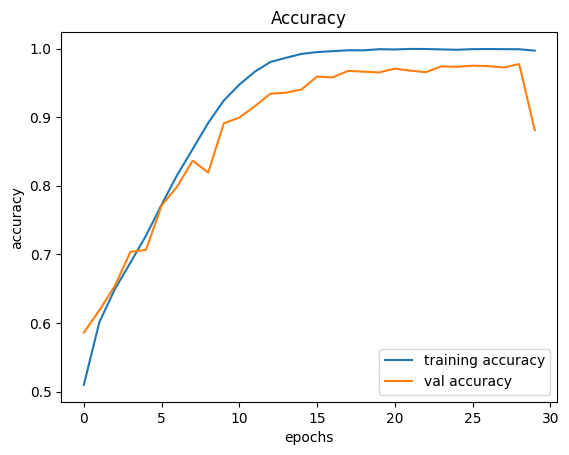

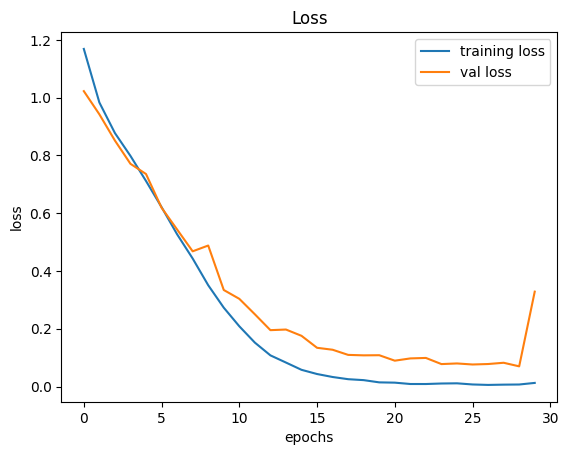

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
X_test,y_test = [],[]

for label, feature in test:
    y_test.append(label)
    X_test.append(feature)

X_test = np.array(X_test).reshape(-1,96,96,1)
X_test = X_test/255

y_test = np.array(y_test)

In [20]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 1s 6ms/step - loss: 0.1182 - accuracy: 0.9592


[0.11819146573543549, 0.9591666460037231]

In [21]:
predictions = model.predict(X_test)
predictions[:5]

188/188 [==============================] - 1s 4ms/step


array([[3.7225916e-03, 1.7738795e-01, 4.1644222e-01, 1.6543610e-01,
        2.3701110e-01],
       [8.8125853e-09, 1.1080716e-05, 7.9503579e-08, 8.8239060e-05,
        9.9990058e-01],
       [2.9320145e-06, 9.9981660e-01, 2.6240046e-05, 1.5417029e-04,
        3.4391263e-08],
       [1.2376707e-06, 7.9173176e-03, 2.3864284e-04, 2.8910264e-02,
        9.6293253e-01],
       [3.3019454e-08, 1.2952889e-03, 1.0277597e-04, 9.9860162e-01,
        4.1124642e-07]], dtype=float32)

In [22]:
predicted = [np.argmax(i) for i in predictions]
predicted[:5]

[2, 4, 1, 4, 3]

In [23]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(50.722222222222214, 0.5, 'Truth')

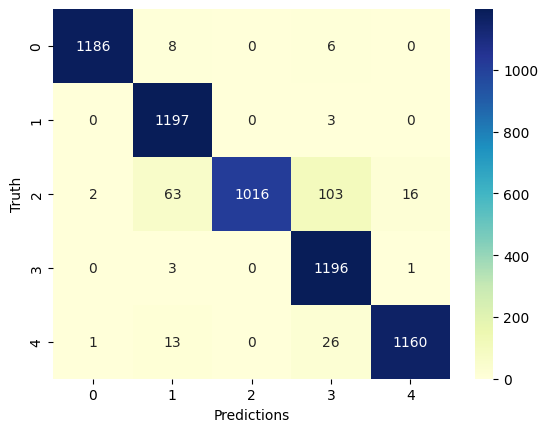

In [25]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [31]:
model.save('GenderFP_finger.keras')

True:  2
1/1 [==============================] - 0s 426ms/step
predicted:  [0.00371948 0.17729402 0.41670242 0.16538827 0.23689589]



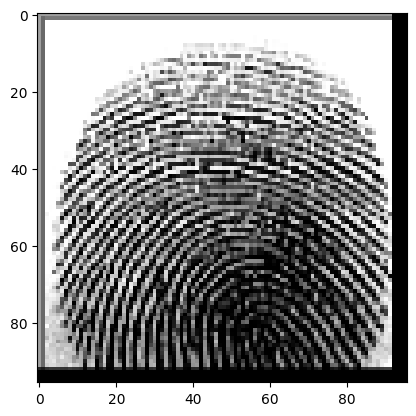

True:  4
1/1 [==============================] - 0s 46ms/step
predicted:  [8.8177634e-09 1.1088443e-05 7.9540278e-08 8.8229128e-05 9.9990058e-01]



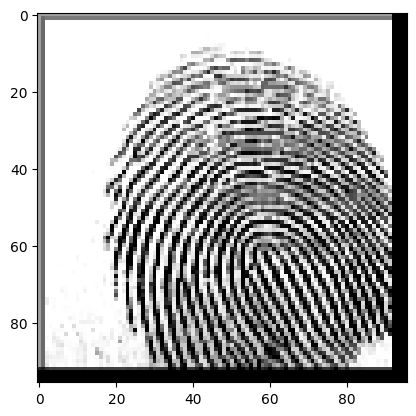

True:  1
1/1 [==============================] - 0s 74ms/step
predicted:  [2.9341347e-06 9.9981648e-01 2.6226608e-05 1.5428588e-04 3.4334501e-08]



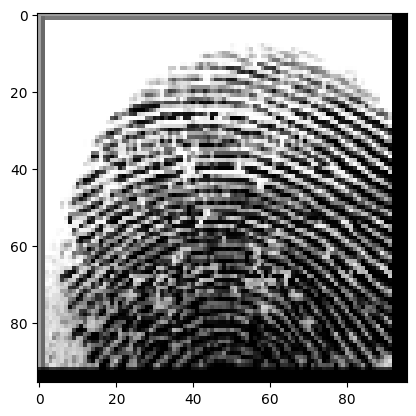

True:  4
1/1 [==============================] - 0s 27ms/step
predicted:  [1.2377520e-06 7.9179695e-03 2.3865759e-04 2.8906023e-02 9.6293610e-01]



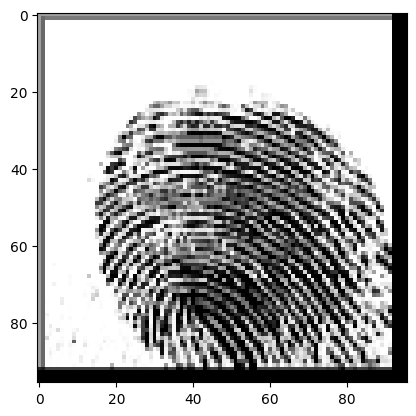

True:  3
1/1 [==============================] - 0s 34ms/step
predicted:  [3.3026726e-08 1.2959351e-03 1.0295952e-04 9.9860066e-01 4.1170318e-07]



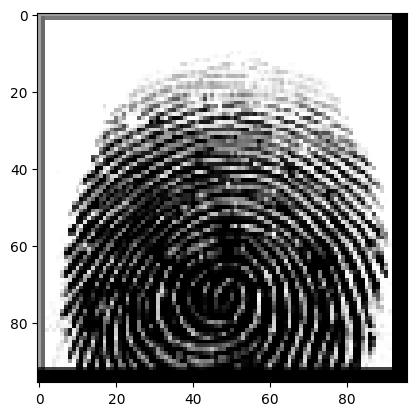

True:  4
1/1 [==============================] - 0s 27ms/step
predicted:  [1.3417442e-06 1.1318113e-03 4.8450956e-06 1.0220573e-02 9.8864144e-01]



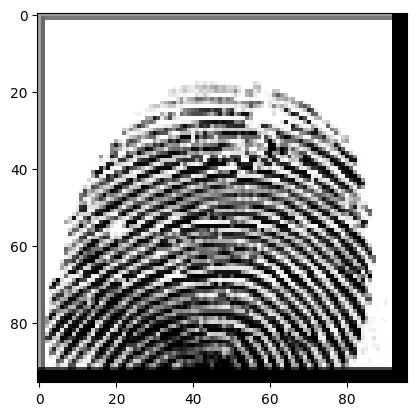

True:  3
1/1 [==============================] - 0s 70ms/step
predicted:  [2.2314689e-05 1.4824100e-03 1.8972069e-05 9.8949707e-01 8.9791473e-03]



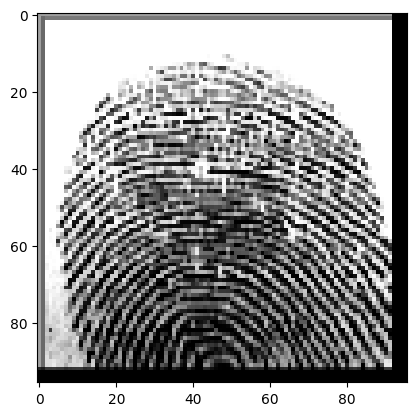

True:  2
1/1 [==============================] - 0s 51ms/step
predicted:  [4.8384745e-08 3.4853090e-03 9.8891592e-01 7.4506896e-03 1.4812461e-04]



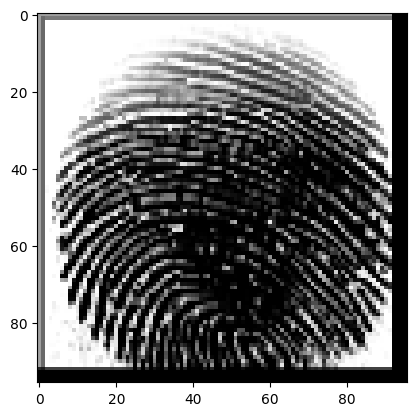

True:  2
1/1 [==============================] - 0s 61ms/step
predicted:  [2.3212814e-04 8.4851071e-04 9.9370402e-01 5.0529749e-03 1.6246582e-04]



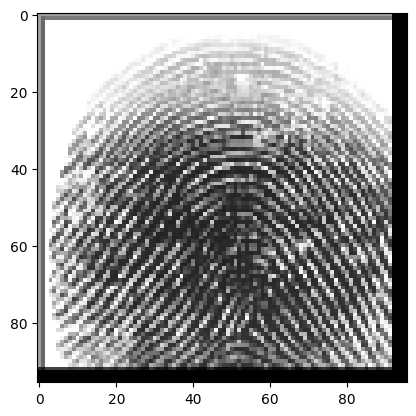

True:  2
1/1 [==============================] - 0s 25ms/step
predicted:  [6.0008585e-09 9.5333876e-03 9.8273736e-01 7.5039575e-03 2.2522880e-04]



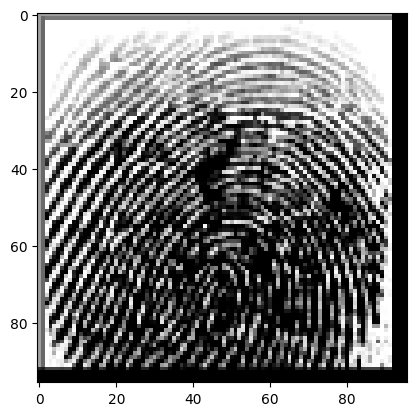

True:  3
1/1 [==============================] - 0s 24ms/step
predicted:  [2.2664470e-07 3.8847458e-03 1.5950369e-05 9.9601644e-01 8.2664053e-05]



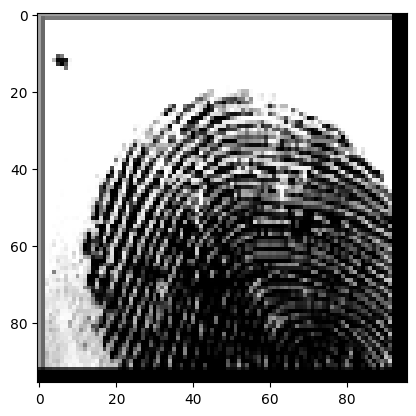

True:  3
1/1 [==============================] - 0s 41ms/step
predicted:  [1.6834601e-03 7.7608427e-05 9.9038880e-04 9.9716324e-01 8.5263091e-05]



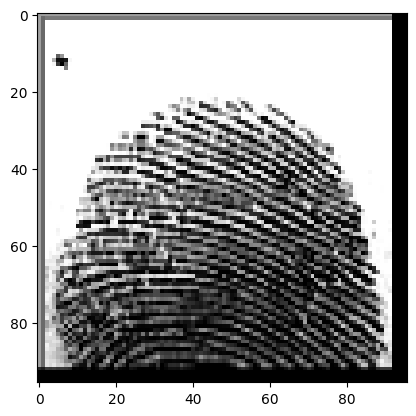

True:  1
1/1 [==============================] - 0s 36ms/step
predicted:  [2.52439281e-06 9.84366059e-01 2.55554565e-04 3.95338138e-05
 1.53362295e-02]



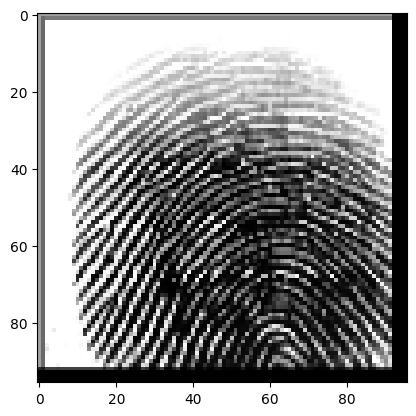

True:  0
1/1 [==============================] - 0s 26ms/step
predicted:  [9.4352829e-01 2.6966477e-04 1.1779895e-02 4.4361252e-02 6.0862898e-05]



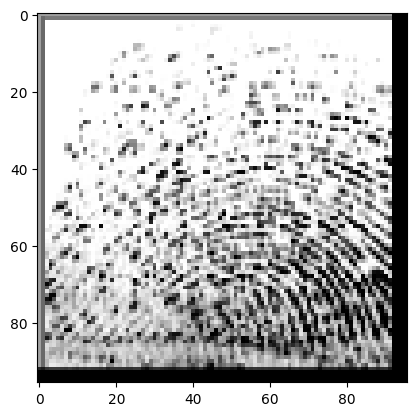

True:  2
1/1 [==============================] - 0s 30ms/step
predicted:  [1.5195207e-08 1.2895097e-04 9.9915648e-01 7.1449031e-04 1.0746234e-09]



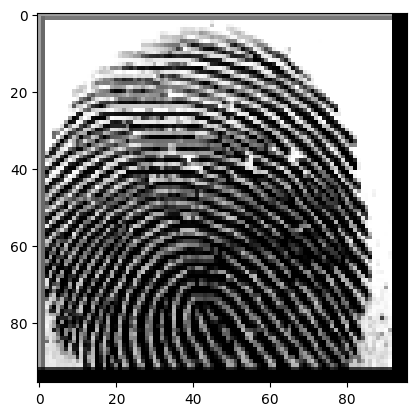

True:  1
1/1 [==============================] - 0s 19ms/step
predicted:  [5.7738902e-08 9.9702978e-01 7.2618849e-07 2.1234243e-07 2.9692419e-03]



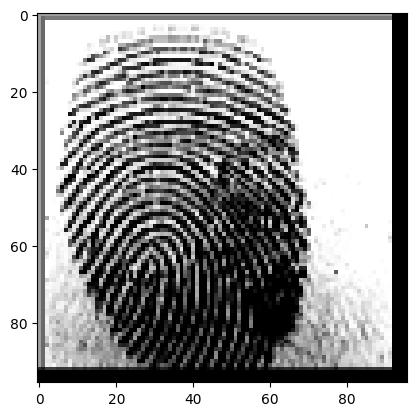

True:  3
1/1 [==============================] - 0s 21ms/step
predicted:  [5.7764155e-11 1.0470268e-04 1.8773072e-03 9.9733424e-01 6.8374194e-04]



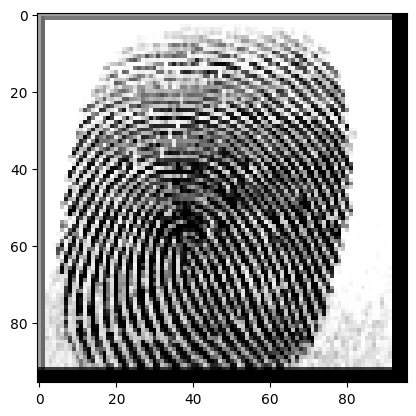

True:  4
1/1 [==============================] - 0s 17ms/step
predicted:  [6.0718394e-05 1.3197941e-02 7.1891198e-05 7.9910848e-03 9.7867841e-01]



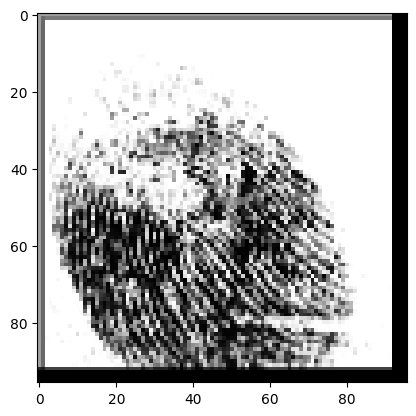

True:  0
1/1 [==============================] - 0s 22ms/step
predicted:  [9.9883884e-01 4.1279974e-04 2.0691790e-05 6.0043222e-04 1.2732722e-04]



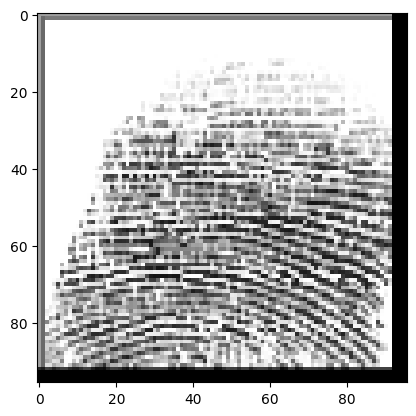

True:  2
1/1 [==============================] - 0s 17ms/step
predicted:  [3.10008932e-06 1.23607576e-01 8.76345634e-01 4.28050880e-05
 7.99910993e-07]



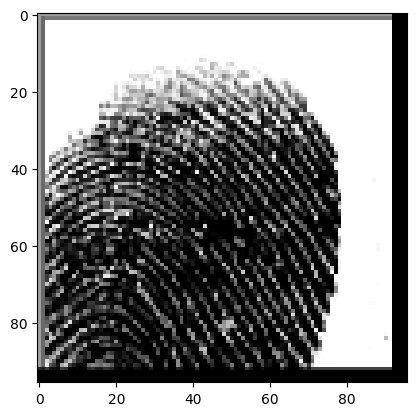

In [28]:
for i in range(20):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(X_test[i],0))[0])
    print()
    plt.imshow(X_test[i],'gray')
    plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
import joblib

In [36]:
joblib.dump(model, 'fp_model_finger.joblib')

['fp_model_finger.joblib']

In [39]:
print(y_test.dtype)
print(y_test.ndim)
print(y_test.shape)

uint16
1
(6000,)


In [43]:
predicted=np.array(predicted)
print(predicted.dtype)
print(predicted.ndim)
print(predicted.shape)


int64
1
(6000,)


In [50]:
precision = precision_score(y_test, predicted,average=None)
recall = recall_score(y_test, predicted,average=None)
f1score = f1_score(y_test,predicted,average=None)

print("Calculated scores for each class")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)

Calculated scores for each class
Precision: [0.99747687 0.93224299 1.         0.89655172 0.9855565 ]
Recall: [0.98833333 0.9975     0.84666667 0.99666667 0.96666667]
F1 Score: [0.99288405 0.96376812 0.91696751 0.94396212 0.97602019]


In [52]:
precision = precision_score(y_test, predicted, average='micro')
recall = recall_score(y_test, predicted, average='micro')
f1 = f1_score(y_test, predicted, average='micro')

print("Calculated micro-averaged scores ")
print("Micro-averaged Precision:", precision)
print("Micro-averaged Recall:", recall)
print("Micro-averaged F1-score:", f1)

Calculated micro-averaged scores 
Micro-averaged Precision: 0.9591666666666666
Micro-averaged Recall: 0.9591666666666666
Micro-averaged F1-score: 0.9591666666666666


In [55]:
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')

print("Calculated macro-averaged scores ")
print("Macro-averaged Precision:", precision)
print("Macro-averaged Recall:", recall)
print("Macro-averaged F1-score:", f1)

Calculated macro-averaged scores 
Macro-averaged Precision: 0.9623656171375531
Macro-averaged Recall: 0.9591666666666667
Macro-averaged F1-score: 0.9587203971251881


In [56]:
precision = precision_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')
f1 = f1_score(y_test, predicted, average='weighted')

print("Calculated weighted-averaged scores ")
print("weighted Precision:", precision)
print("weighted Recall:", recall)
print("weighted F1-score:", f1)

Calculated weighted-averaged scores 
weighted Precision: 0.962365617137553
weighted Recall: 0.9591666666666666
weighted F1-score: 0.9587203971251882
